In [1]:
import pandas as pd
import numpy as np

# Editing pulse calculation
pulse_df = pd.read_csv(
    'SLR25600.INR5_OUTR1.pta',
    sep=r"\s+",
    index_col=False,
    skip_blank_lines=True,
    names=['Amplitude', 'Phase'],
    skiprows=8)

EDIT_AMP_INT = 277.145997509 
pulse_dur_edit = 22.277
amp_int_rel = EDIT_AMP_INT / pulse_df['Amplitude'].size
fa = 180
pulse_length_edit = pulse_dur_edit / 1E3  # In s.
pulse_amp_hz = 500 * (1E-3/pulse_length_edit) * (fa/180) * (1/amp_int_rel)
editing_pulse_hz = pulse_df['Amplitude'].to_numpy()\
    * np.exp(1j * pulse_df['Phase'].to_numpy())
editing_pulse_hz *= pulse_amp_hz


/var/folders/nn/v2nq0rss0yz3zzf069f84hxw0000gt/T/ipykernel_60029/2579463175.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  pulse_df = pd.read_csv(


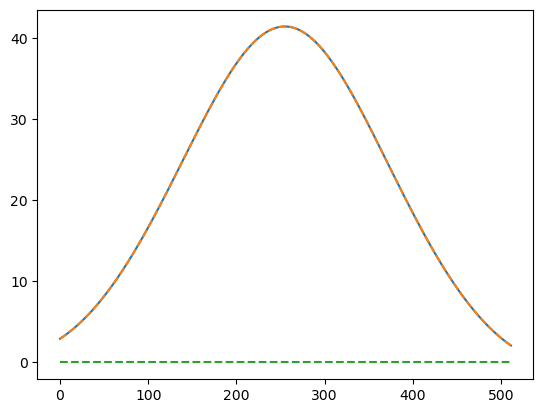

In [3]:
import matplotlib.pyplot as plt

plt.plot(np.abs(editing_pulse_hz))
plt.plot(editing_pulse_hz.real,'--')
plt.plot(editing_pulse_hz.imag,'--')

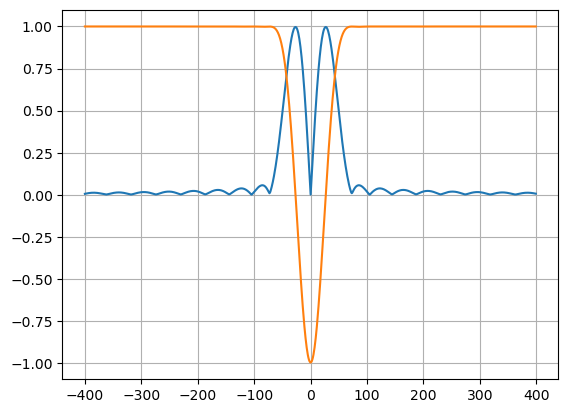

In [5]:
from bloch.bloch import bloch

g = np.zeros(editing_pulse_hz.shape)

dt = (pulse_dur_edit / 1E3) / editing_pulse_hz.size
t1 = 5.0
t2 = 5.0
dp = 0
df = np.arange(-400,400,1, dtype=float)
mode = 0

mx_0 = 0
my_0 = 0
mz_0 = 1

mx, my, mz = bloch(editing_pulse_hz, g, dt, t1, t2, df, dp, mode, mx_0, mx_0, mx_0)

plt.plot(df,np.abs(mx+1j*my))
plt.plot(df,mz)
plt.grid()
plt.show()

In [8]:
taxis = np.arange(0, pulse_dur_edit, pulse_dur_edit/editing_pulse_hz.size)
taxis /= 1000
taxis.shape

(512,)

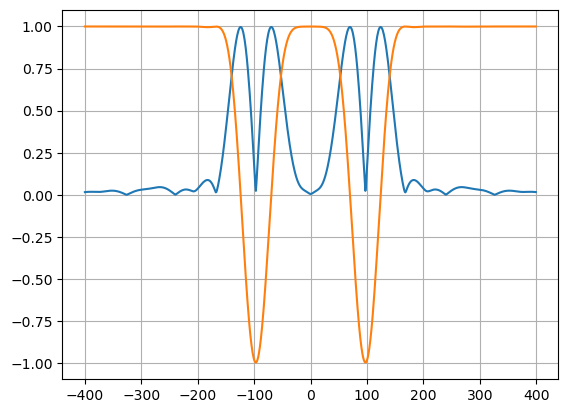

In [9]:
def shifted_pulse(shift):
    return editing_pulse_hz * np.exp(1j * 2 * np.pi * taxis * shift)
editing_db = shifted_pulse(100) + shifted_pulse(-100)

g = np.zeros(editing_db.shape)

dt = (pulse_dur_edit / 1E3) / editing_db.size
t1 = 5.0
t2 = 5.0
dp = 0
df = np.arange(-400,400,1, dtype=float)
mode = 0

mx_0 = 0
my_0 = 0
mz_0 = 1

mx, my, mz = bloch(editing_db, g, dt, t1, t2, df, dp, mode, mx_0, mx_0, mx_0)

plt.plot(df,np.abs(mx+1j*my))
plt.plot(df,mz)
plt.grid()
plt.show()